# 🧠 Exploratory Data Analysis: COPPARisk Dataset
Application Risk Analysis Related to COPPA Compliance

### 📌 Dataset Description

In today's digital era, children's access to mobile applications has become increasingly widespread. However, this also raises concerns about the potential misuse of their personal data.

Regulations like the Children’s Online Privacy Protection Act (COPPA) in the United States require app developers to obtain parental consent before collecting data from children under the age of 13.

The COPPARisk dataset was developed to help identify applications that potentially violate COPPA guidelines by analyzing various features such as:
- App genre
- Number of downloads
- Privacy policy
- Developer information
- And other relevant attributes


# 📦 1. Install and Import Library

In [ ]:
!pip install category_encoders

In [ ]:
import pandas as pd 
import numpy as np  

# data visualization libraries
import matplotlib.pyplot as plt  
import seaborn as sns  

from category_encoders import CatBoostEncoder 
from sklearn.preprocessing import OneHotEncoder 

import warnings
warnings.filterwarnings('ignore')  # Menyembunyikan peringatan runtime agar output lebih bersih


# 📂 2. Load & Prepare Dataset

In [ ]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
df_target = pd.read_csv('../data/target.csv')

In [ ]:
print("df_train, df_test, df_target")
print(df_train.shape, df_test.shape, df_target.shape)

for col in df_test.columns:
    if col not in df_train.columns:
        print(f"Column {col} is missing in train set")
        df_train[col] = np.nan 

df_train, df_test, df_target
(7000, 16) (3000, 17) (7000, 1)
Column ID is missing in train set


In [ ]:
df_test['ID'].sort_values().head(6)
df_train['ID'] = -1

In [ ]:
# tambahkan target ke df_train
df_train['coppaRisk'] = df_target['coppaRisk']
df_test['coppaRisk'] = np.nan
df_train['coppaRisk'].unique()

array([False,  True])

In [ ]:
df_train.to_csv('../data/train_with_target.csv', index=False)
df_test.to_csv('../data/test_with_target.csv', index=False)

In [ ]:
# merge train and test
df = pd.concat([df_train, df_test], axis=0)
df.shape

(10000, 18)

In [ ]:
df.dtypes

,0
developerCountry,object
countryCode,object
userRatingCount,int64
primaryGenreName,object
downloads,object
deviceType,object
hasPrivacyLink,object
hasTermsOfServiceLink,object
hasTermsOfServiceLinkRating,object
isCorporateEmailScore,float64


In [ ]:
df.describe()

,userRatingCount,isCorporateEmailScore,adSpent,appAge,averageUserRating
count,7.000000e+03,5872.000000,1.321000e+03,6950.000000,5768.000000
mean,3.256274e+04,45.740293,3.977563e+03,57.093060,2.482490
std,5.501431e+05,49.361215,9.219919e+04,37.169895,1.905712
min,0.000000e+00,0.000000,7.038525e-03,0.533333,0.000000
25%,0.000000e+00,0.000000,1.086920e+00,27.533333,0.000000
50%,1.000000e+00,0.000000,7.945580e+00,52.866667,3.000000
75%,8.800000e+01,99.000000,4.908375e+01,80.000000,4.000000
max,3.854334e+07,99.000000,3.143906e+06,196.466667,5.000000


# ❓ 3. Check Missing Values
Mengecek dan menangani nilai yang hilang pada dataset.

In [ ]:
# Cek Nilai yang hilang di setiap kolom
print("Missing values in dataset: \n")
print(df.isnull().sum())

Missing values in dataset: 

developerCountry                      0
countryCode                          64
userRatingCount                       0
primaryGenreName                      0
downloads                          2149
deviceType                            0
hasPrivacyLink                      750
hasTermsOfServiceLink              4635
hasTermsOfServiceLinkRating        4635
isCorporateEmailScore              1128
adSpent                            5679
appAge                               50
averageUserRating                  1232
appContentBrandSafetyRating        6162
appDescriptionBrandSafetyRating       0
mfaRating                             0
coppaRisk                             0
dtype: int64


In [ ]:
# persentase nilai yang hilang
missing_percentage = df.isnull().mean().sort_values(ascending=False) * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage

,0
appContentBrandSafetyRating,88.028571
adSpent,81.128571
hasTermsOfServiceLink,66.214286
hasTermsOfServiceLinkRating,66.214286
downloads,30.700000
averageUserRating,17.600000
isCorporateEmailScore,16.114286
hasPrivacyLink,10.714286
countryCode,0.914286
appAge,0.714286


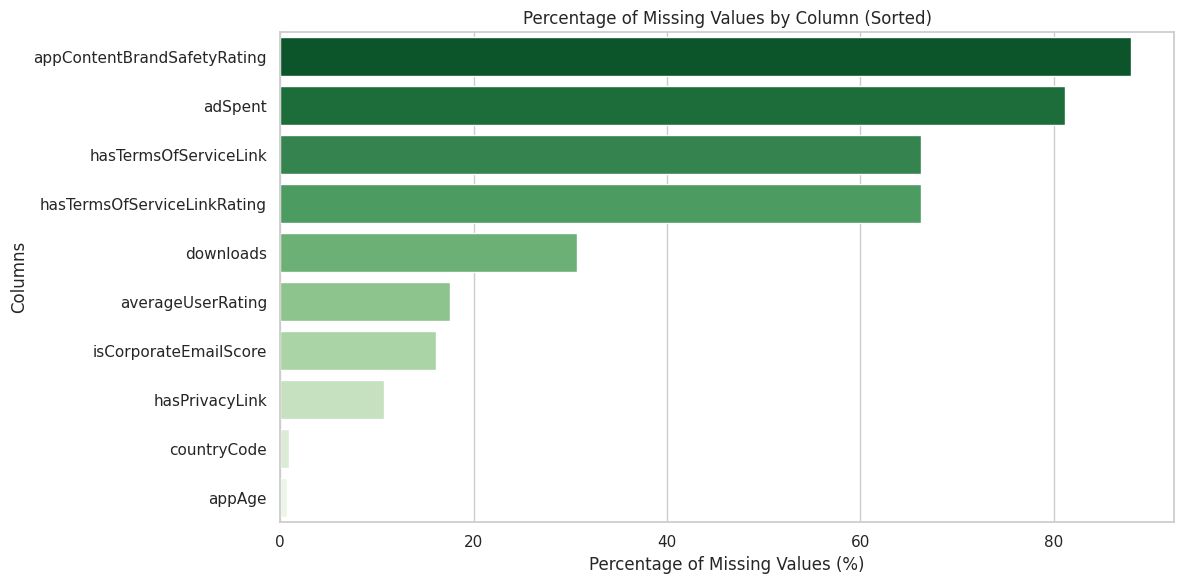

In [ ]:
# membuat horizontal bar chart menggunakan seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage.values, y=missing_percentage.index, orient='h', palette='Greens_r')
plt.xlabel('Percentage of Missing Values (%)')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values by Column (Sorted)')
plt.tight_layout()
plt.show()

In [ ]:
# drop kolom yang memiliki > 80 % MISSING VALUES
columns_to_drop = missing_percentage[missing_percentage > 80].index
df = df.drop(columns=columns_to_drop)
df.shape

(7000, 15)

# 🧹 4. Preprocessing Data (Per Column)

## 🌍 4.1 Country Code

In [ ]:
df['countryCode'].unique()

array(['RO', 'GLOBAL', 'CZ', nan, 'GT', 'RU', 'EMEA', 'HR', 'APAC', 'ES',
       'DE', 'LATAM', 'ID', 'ZM', 'PH', 'BG', 'KG', 'IT', 'UG', 'NL',
       'BD', 'SE', 'PL', 'TH', 'VN', 'SA', 'AR', 'UA', 'MY', 'MX', 'AM',
       'US', 'AT', 'BR', 'BY', 'UZ', 'TR', 'MN', 'NO', 'PS', 'GB', 'GR',
       'SG', 'BE', 'GE', 'CO', 'AE', 'EC', 'IN', 'OM', 'JO', 'TN', 'PT',
       'SO', 'CN', 'HK', 'NG', 'NZ', 'ZA', 'HN', 'CL', 'PK', 'KH', 'FR',
       'KZ', 'DO', 'SK', 'QA', 'CI', 'NI', 'TW', 'CH', 'CA', 'KR', 'JP',
       'AZ', 'LB', 'AU', 'PY', 'SX', 'CY', 'HU', 'FI', 'PR', 'CR', 'SN',
       'IQ', 'TJ', 'PA', 'KW', 'RS', 'DK', 'EG', 'IL', 'LY', 'SD', 'AF',
       'UY', 'MM', 'IE', 'SV', 'BH', 'MK', 'VE', 'BJ', 'GY', 'PE', 'CD',
       'GU', 'EE', 'DJ', 'DZ', 'KE', 'YE', 'JM', 'MA', 'CM', 'RE', 'LK',
       'IR'], dtype=object)

In [ ]:
print("Null Values in Country Code: ",df['countryCode'].isna().sum())

Null Values in Country Code:  64


In [ ]:
# fill missing with '__UNKNOWN__' untuk nanti di encode dengan catboost encoder
df['countryCode'] = df['countryCode'].fillna('__UNKNOWN__')
df['countryCode'].isna().sum()

np.int64(0)

## 🗺️ 4.2 Developer Country

In [ ]:
print("Null Values in Developer Country: ",df['developerCountry'].isna().sum())

Null Values in Developer Country:  0


In [ ]:
df['developerCountry'].unique()

array(['NORWAY', 'ADDRESS NOT LISTED IN PLAYSTORE',
       'UNITED ARAB EMIRATES', 'GERMANY', 'CANNOT IDENTIFY COUNTRY',
       'FINLAND', 'SINGAPORE', 'UNITED STATES', 'REPUBLIC OF KOREA',
       'MONGOLIA', 'PAKISTAN', 'VIET NAM', 'OMAN', 'FRANCE', 'INDIA',
       'CHINA', 'NETHERLANDS', 'RUSSIAN FEDERATION', 'INDONESIA', 'ITALY',
       'UZBEKISTAN', 'UNITED KINGDOM', 'CANADA', 'NEW ZEALAND',
       'SRI LANKA', 'AUSTRALIA', "COTE D'IVOIRE", 'IRELAND', 'KAZAKHSTAN',
       'HONG KONG', 'CHILE', 'BAHRAIN', 'JAPAN', 'SWITZERLAND', 'ISRAEL',
       'SPAIN', 'TURKEY', 'ESTONIA', 'SWEDEN', 'DOMINICAN REPUBLIC',
       'AUSTRIA', 'MALAYSIA', 'POLAND', 'CYPRUS', 'UKRAINE',
       'ISLE OF MAN', 'ARGENTINA', 'BANGLADESH', 'ICELAND', 'JORDAN',
       'MOROCCO', 'PERU', 'NIGER', 'BULGARIA', 'ROMANIA', 'SLOVENIA',
       'SOUTH AFRICA', 'KENYA', 'NIGERIA', 'ALBANIA', 'CZECH REPUBLIC',
       'SAUDI ARABIA', 'PANAMA', 'ANDORRA', 'THAILAND', 'MALTA',
       'VENEZUELA', 'GREECE', 'YEMEN', 'EGYPT

In [ ]:
missing_indicators = [
    "", "ADDRESS NOT LISTED IN PLAYSTORE",
    "PERSONAL DATA, CAN NOT BE PUBLICLY DISCLOSED ACCORDING TO APPLICABLE LAWS.",
    "STATUTORY MASKING ENABLED", "CANNOT IDENTIFY COUNTRY"
]
df["developerCountry"] = df["developerCountry"].replace(missing_indicators, np.nan)

In [ ]:
print(f'Total Null Values in Developer Country: {df["developerCountry"].isna().sum()}')

Total Null Values in Developer Country: 5109


In [ ]:
print(f'percentage Null Value in Developer Country: {round(df["developerCountry"].isna().sum() / len(df) * 100, 2)} %')

percentage Null Value in Developer Country: 72.99 %


In [ ]:
# Ganti nilai null dengan '__UNKNOWN__'
df['developerCountry'] = df['developerCountry'].fillna('__UNKNOWN__')
df['developerCountry'].isna().sum()

np.int64(0)

## 🧩 4.3 Primary App Genre (`primaryGenreName`)

In [ ]:
print("Null Values: ", df['primaryGenreName'].isna().sum())

Null Values:  0


In [ ]:
df['primaryGenreName'].unique()

array(['Sports', 'Medical', 'Games', 'Tools', 'Personalization',
       'Business', 'Entertainment', 'Lifestyle', 'Education', 'Beauty',
       'Health & Fitness', 'Social', 'Events', 'News & Magazines',
       'Shopping', 'Music & Audio', 'Utilities', 'Food & Drink',
       'Maps & Navigation', 'Communication', 'Travel & Local',
       'Productivity', 'Reference', 'Finance', 'Photography',
       'Books & Reference', 'Art & Design', 'Comics', 'Stickers',
       'Travel', 'Auto & Vehicles', 'Video Players & Editors', 'Music',
       'Photo & Video', 'News', 'House & Home', 'Social Networking',
       'Weather', 'Navigation', 'Dating', 'Book', 'Parenting',
       'Developer Tools', 'Graphics & Design', 'Magazines & Newspapers',
       'Libraries & Demo'], dtype=object)

Di dalam kolom ini tidak terdapat nilai yang hilang

## 📥 4.4 Downloads

In [ ]:
print("Null Values in Downloads: ", df['downloads'].isna().sum())

Null Values in Downloads:  2149


In [ ]:
df['downloads'].unique()

array([nan, '50 - 100', '50000000 - 100000000', '1000 - 5000', '1 - 5',
       '100 - 500', '10000 - 50000', '50000 - 100000', '10 - 50',
       '5 - 10', '100000 - 500000', '5000 - 10000', '500 - 1000',
       '1000000 - 5000000', '0 - 1', '10000000 - 50000000',
       '500000 - 1000000', '1 - 1', '5000000 - 10000000', '10 - 1',
       '100000000 - 500000000', '5 - 1', '10000000000 - 15000000000',
       '500 - 1', '500000000 - 1000000000', '1000000000 - 5000000000',
       '50 - 1'], dtype=object)

As the column is of object type, we converted it to numeric by extracting the minimum and maximum values, then replacing it with their average.

In [ ]:
# memisahkan downloads menjadi min and max
def parse_downloads(value):
    if pd.isna(value): return (np.nan, np.nan)
    parts = value.replace(',', '').split(' - ')
    return int(parts[0]), int(parts[1])

df[['downloads_min', 'downloads_max']] = df['downloads'].apply(parse_downloads).apply(pd.Series)

# Tukar nilai jika downloads_min > downloads_max
swap_mask = df['downloads_min'] > df['downloads_max']
df.loc[swap_mask, ['downloads_min', 'downloads_max']] = df.loc[swap_mask, ['downloads_max', 'downloads_min']].values

In [ ]:
print("Null Values in Downloads Min: ", df['downloads_min'].isna().sum())
print("Null Values in Downloads Max: ", df['downloads_max'].isna().sum())

df['downloads'].nunique(), df['downloads_min'].nunique(), df['downloads_max'].nunique()

Null Values in Downloads Min:  2149
Null Values in Downloads Max:  2149


(26, 21, 21)

In [ ]:
# isi nilai missing dengan median
df['downloads_min'] = df['downloads_min'].fillna(df['downloads_min'].median())
df['downloads_max'] = df['downloads_max'].fillna(df['downloads_max'].median())

# mengganti nilai downloads dengan download_min + downlaod_max / 2
df['downloads'] = (df['downloads_min'] + df['downloads_max']) / 2

## 🔐 4.5 Privacy Policy & Terms of Service Links
- Does the application have a link to its privacy policy?
- Does it provide a link to its Terms of Service?


In [ ]:
df['hasPrivacyLink'].unique()

array([True, nan, False], dtype=object)

In [ ]:
df['hasTermsOfServiceLink'].unique()

array([True, nan, False], dtype=object)

In [ ]:
print('null values di masing masing kolom:')
df[['hasPrivacyLink', 'hasTermsOfServiceLink']].isna().sum()

null values di masing masing kolom:


,0
hasPrivacyLink,750
hasTermsOfServiceLink,4635


In [ ]:
# ubah hasPrivacyLink menjadi numeric
df["hasPrivacyLink"] = pd.to_numeric(df["hasPrivacyLink"], errors="coerce")
df["hasTermsOfServiceLink"] = pd.to_numeric(df["hasTermsOfServiceLink"], errors="coerce")
df['hasPrivacyLink'].unique(), df['hasTermsOfServiceLink'].unique()

(array([ 1., nan,  0.]), array([ 1., nan,  0.]))

In [ ]:
# isi null dengan -1 sebagai pembeda antara yes dan no
df["hasPrivacyLink"] = df["hasPrivacyLink"].fillna(-1)
df["hasTermsOfServiceLink"] = df["hasTermsOfServiceLink"].fillna(-1)

In [ ]:
# cek kembali missing di kedua kolom
df[['hasPrivacyLink', 'hasTermsOfServiceLink']].isna().sum()

,0
hasPrivacyLink,0
hasTermsOfServiceLink,0


## 🛡️ 4.6 TOS Rating

In [ ]:
df['hasTermsOfServiceLinkRating'].unique()

array(['low', nan, 'high'], dtype=object)

In [ ]:
print('null values di kolom:')
df[['hasTermsOfServiceLinkRating']].isna().sum()

null values di kolom:


,0
hasTermsOfServiceLinkRating,4635


In [ ]:
print("has TOS rating values:",df['hasTermsOfServiceLinkRating'].unique().tolist())

has TOS rating values: ['low', nan, 'high']


In [ ]:
# ganti null dengan unknown (untuk ordinal values)
df["hasTermsOfServiceLinkRating"] = df["hasTermsOfServiceLinkRating"].fillna("unknown")

## 🏢 4.7 Is Corporate Email Score

In [ ]:
df['isCorporateEmailScore'].unique()

array([99.,  0., nan])

In [ ]:
print(f'Null Values in isCorporateEmailScore: {df["isCorporateEmailScore"].isna().sum()}')

Null Values in isCorporateEmailScore: 1128


In [ ]:
# Nilai unik di kolom isCorporateEmailScore
df['isCorporateEmailScore'].unique()

array([99.,  0., nan])

In [ ]:
df['isCorporateEmailScore'].value_counts()

,count
isCorporateEmailScore,
0.0,3159
99.0,2713


In [ ]:
# mengisi nilai null dengan -1 agar tidak menggangu proses belajar model
df['isCorporateEmailScore'] = df['isCorporateEmailScore'].fillna(-1)

In [ ]:
df['isCorporateEmailScore'].isna().sum()

np.int64(0)

## 📌 4.8 App Age and User Rating

In [ ]:
other_columns = ["appAge", "averageUserRating"]
print("null values dalam kolom sisanya:")
df[other_columns].isna().sum()

null values dalam kolom sisanya:


,0
appAge,50
averageUserRating,1232


In [ ]:
# Tandai missing value pada ketiga kolom tersebut
# mengisi null dengan median
for col in other_columns:
    df[f"{col}_missing"] = df[col].isna().astype(int)
    df[col] = df[col].fillna(df[col].median())

In [ ]:
df[other_columns].isna().sum()

,0
appAge,0
averageUserRating,0


In [ ]:
# check null
print(f'Total Null Values in Dataset: {df.isnull().sum().sum()}')

Total Null Values in Dataset: 0


# 📈 6. Visualization and Insight Data

## 📊 6.1 Variabel Distributions

In [ ]:
# numeric columns in dataset
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns

['userRatingCount',
 'downloads',
 'hasPrivacyLink',
 'hasTermsOfServiceLink',
 'isCorporateEmailScore',
 'appAge',
 'averageUserRating',
 'downloads_min',
 'downloads_max',
 'appAge_missing',
 'averageUserRating_missing']

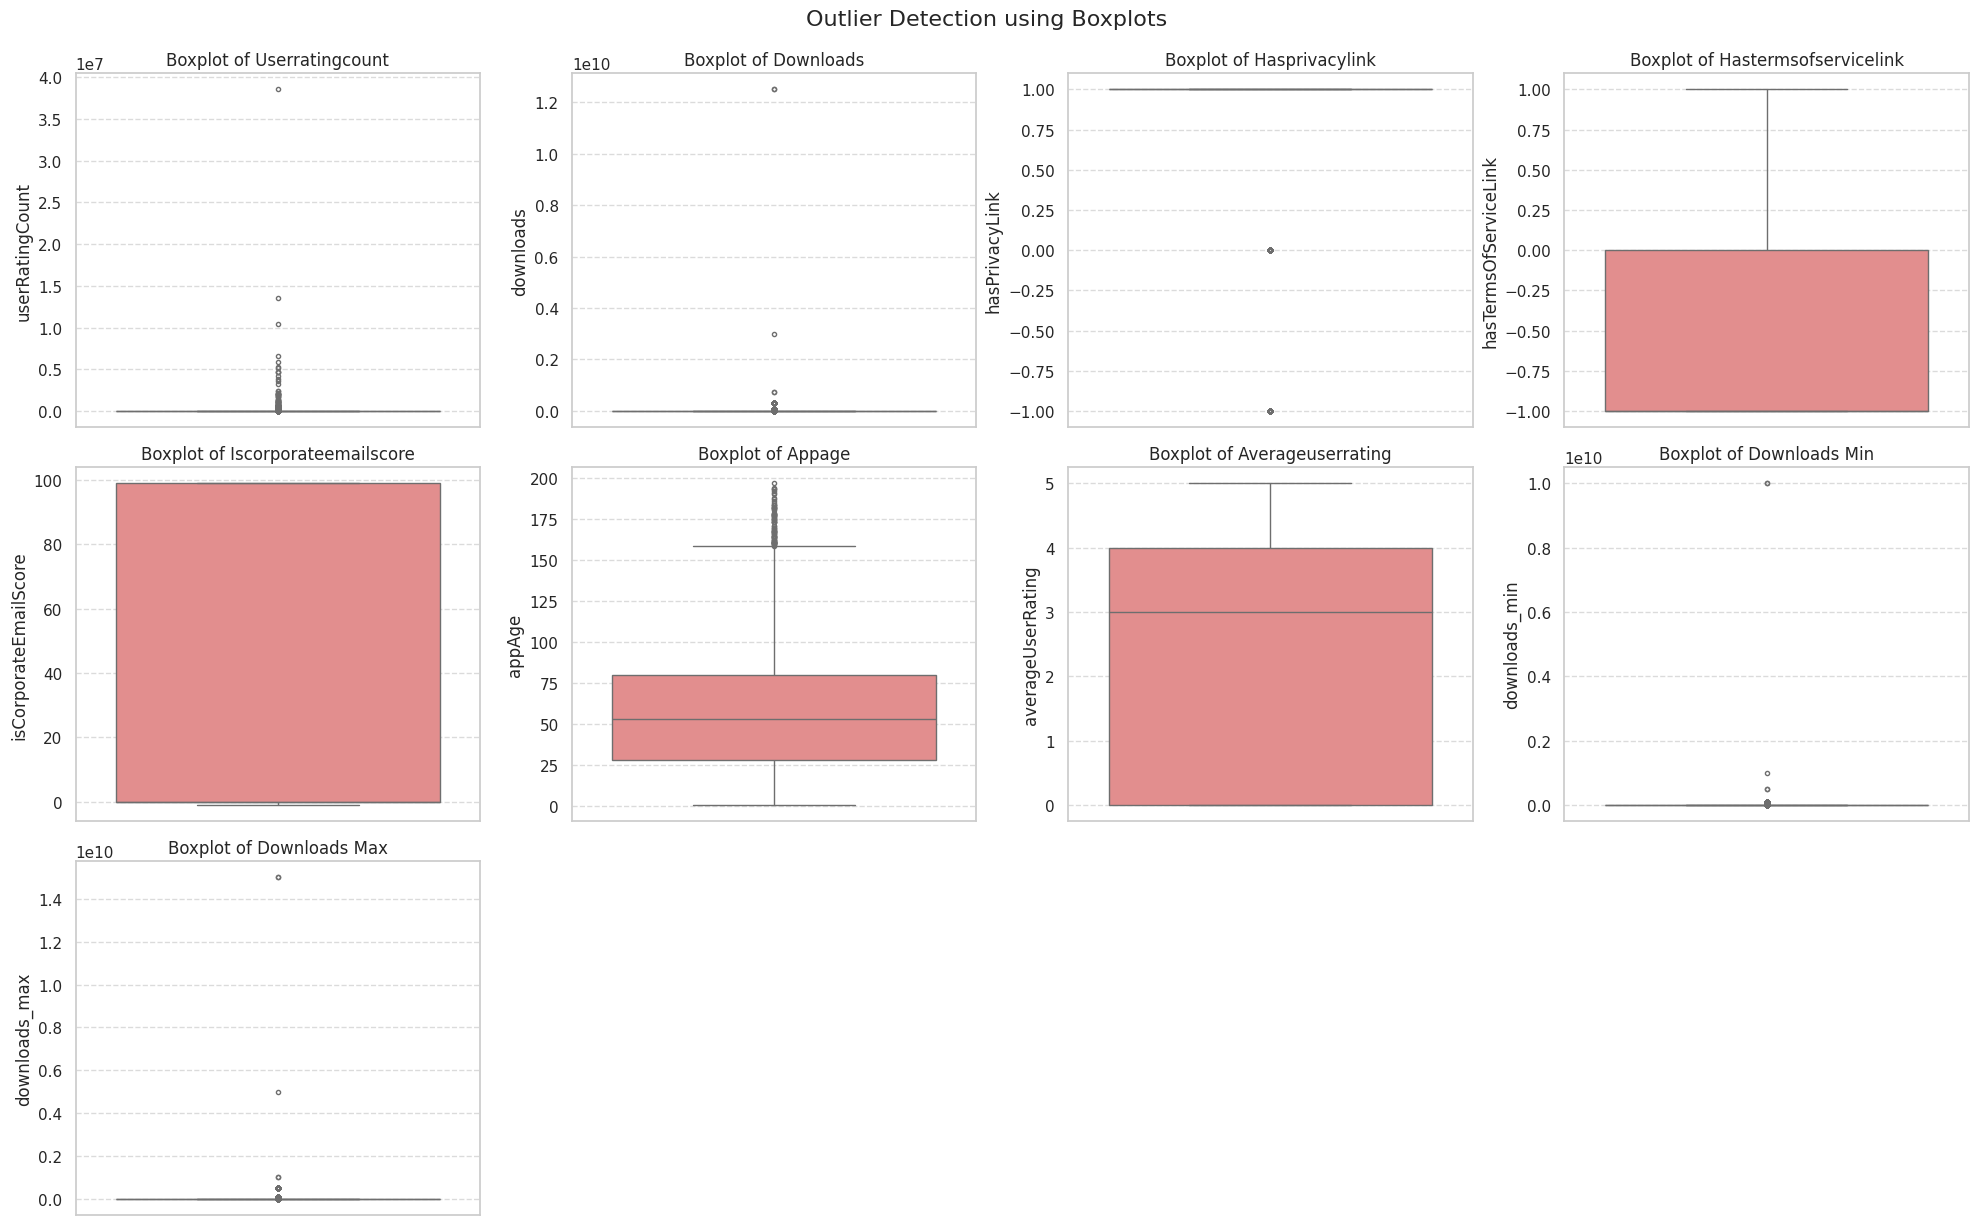

In [ ]:
# Filter kolom numeric yang TIDAK mengandung kata 'missing' (case insensitive)
filtered_columns = [col for col in numeric_columns if 'missing' not in col.lower()]

n_cols = 4
n_rows = (len(filtered_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(filtered_columns):
    sns.boxplot(y=df[col], ax=axes[i], color='lightcoral', fliersize=3)
    clean_col_name = col.replace('_', ' ').title()
    axes[i].set_title(f'Boxplot of {clean_col_name}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Outlier Detection using Boxplots', y=1.02, fontsize=16)
plt.show()

In [ ]:
# log transform for skewed distributions
df['userRatingCount_log'] = np.log1p(df['userRatingCount'])
df['downloads_log'] = np.log1p(df['downloads']) # log transform
df['downloads_min_log'] = np.log1p(df['downloads_min'])
df['downloads_max_log'] = np.log1p(df['downloads_max'])

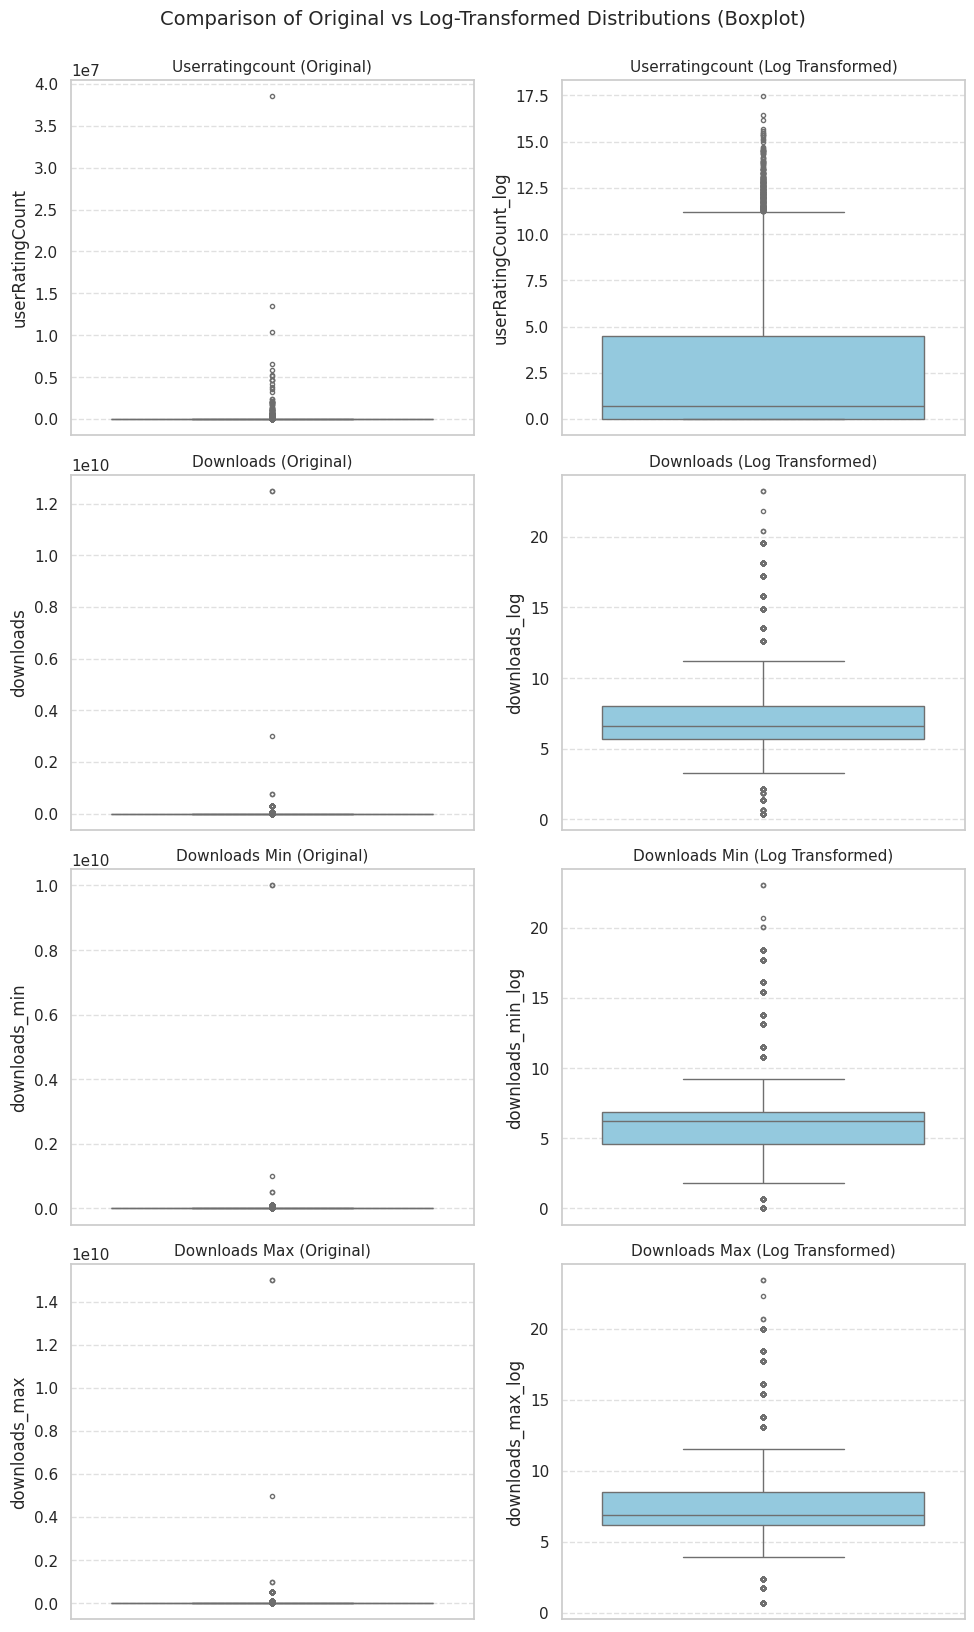

In [ ]:
# Kolom numeric, tanpa yang mengandung 'missing'
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
filtered_columns = [col for col in numeric_columns if 'missing' not in col.lower() and '_log' not in col.lower()]

# Daftar kolom yang akan dilog transformasi
log_targets = ['userRatingCount', 'downloads', 'downloads_min', 'downloads_max']

# Buat log transform
for col in log_targets:
    if col in df.columns:
        df[f'{col}_log'] = np.log1p(df[col])

# Kolom hasil transformasi
log_columns = [f'{col}_log' for col in log_targets if f'{col}_log' in df.columns]
original_columns = [col for col in log_targets if col in df.columns]

# Perbandingan: original vs log (boxplot side-by-side)
n_cols = 2
n_rows = len(original_columns)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

if n_rows == 1:
    axes = [axes]  # untuk 1 baris, axes harus dijadikan list of axes

for i, col in enumerate(original_columns):
    # Original
    sns.boxplot(y=df[col], ax=axes[i][0], color='salmon', fliersize=3)
    axes[i][0].set_title(f"{col.replace('_',' ').title()} (Original)", fontsize=11)
    axes[i][0].grid(axis='y', linestyle='--', alpha=0.6)

    # Log-transformed
    log_col = f"{col}_log"
    sns.boxplot(y=df[log_col], ax=axes[i][1], color='skyblue', fliersize=3)
    axes[i][1].set_title(f"{col.replace('_',' ').title()} (Log Transformed)", fontsize=11)
    axes[i][1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.suptitle("Comparison of Original vs Log-Transformed Distributions (Boxplot)", y=1.02, fontsize=14)
plt.show()


## ❓ 6.2 Insight Data

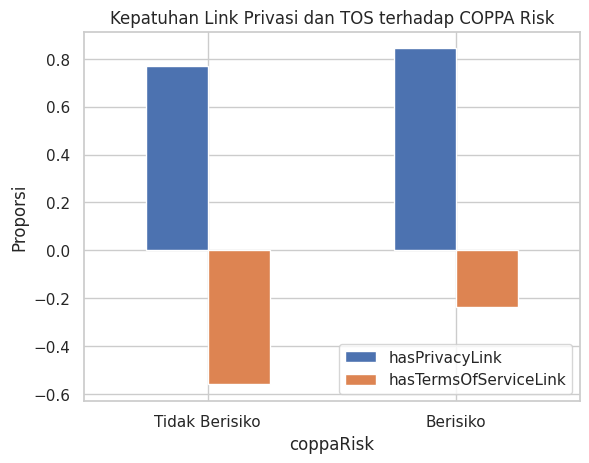

In [ ]:
coppa_group = df.groupby('coppaRisk')[['hasPrivacyLink', 'hasTermsOfServiceLink']].mean()

coppa_group.plot(kind='bar')
plt.title('Kepatuhan Link Privasi dan TOS terhadap COPPA Risk')
plt.ylabel('Proporsi')
plt.xticks([0,1], ['Tidak Berisiko', 'Berisiko'], rotation=0)
plt.show()


In [ ]:
df['mfaRating'].value_counts()

,count
mfaRating,
low,6983
medium,9
high,8


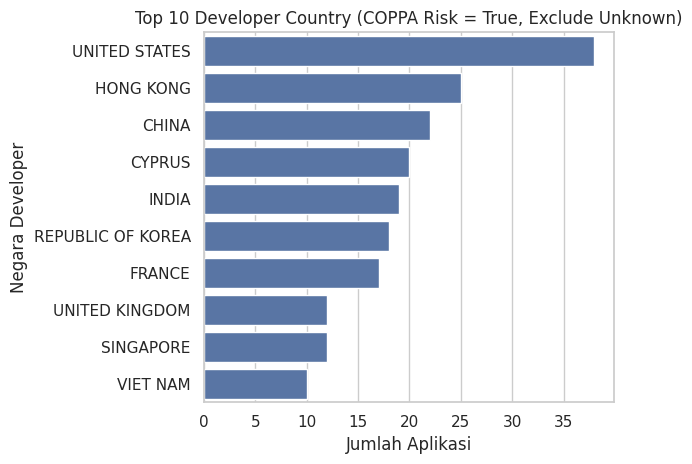

In [ ]:
# Daftar negara yang ingin di-exclude
exclude_countries = ["__UNKNOWN__"]

# Filter: coppaRisk == True dan negara bukan __UNKNOWN__
filtered_df = df[(df['coppaRisk'] == True) & (~df['developerCountry'].isin(exclude_countries))]

# Hitung top 10 negara developer
top_countries = filtered_df['developerCountry'].value_counts().head(10)

# Visualisasi
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Developer Country (COPPA Risk = True, Exclude Unknown)')
plt.xlabel('Jumlah Aplikasi')
plt.ylabel('Negara Developer')
plt.tight_layout()
plt.show()


In [ ]:
# Filter hanya aplikasi dengan coppaRisk == True
coppa_true_df = df[df['coppaRisk'] == True]

# Hitung jumlah aplikasi per genre
top_genres = coppa_true_df['primaryGenreName'].value_counts().head(10).reset_index()
top_genres.columns = ['primaryGenreName', 'jumlahAplikasi']

# Visualisasi dengan Plotly
fig = px.bar(
    top_genres,
    x='jumlahAplikasi',
    y='primaryGenreName',
    orientation='h',
    title='Top 10 Genre Aplikasi dengan COPPA Risk = True',
    labels={'primaryGenreName': 'Genre Utama', 'jumlahAplikasi': 'Jumlah Aplikasi'},
    color='jumlahAplikasi',
    color_continuous_scale='Reds'
)

fig.update_layout(yaxis=dict(autorange='reversed'))  # genre dengan risiko tertinggi di atas
fig.show()


# 🔄 7. Encoding & Feature Engineering
- Encoding label categorical/ordinal
- Feature Engineering from cleaned data

## Encode

In [ ]:
categorical_columns = ['primaryGenreName', 'deviceType', 'developerCountry', 'countryCode']

# cek nilai unik di categorical_column
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].nunique()}")

Unique values in primaryGenreName: 46
Unique values in deviceType: 5
Unique values in developerCountry: 111
Unique values in countryCode: 120


In [ ]:
categorical_columns_low_cardinal = ['deviceType']
categorical_columns_high_cadinal = ['developerCountry', 'countryCode', 'primaryGenreName']
ordinal_columns = ['hasTermsOfServiceLinkRating','appDescriptionBrandSafetyRating', 'mfaRating']


In [ ]:
# ordinal encoder
ordinal_mapping = {'low': 0, 'medium': 1, 'high': 2, 'unknown': -1}
for col in ordinal_columns:
    df[col] = df[col].map(ordinal_mapping)

In [ ]:
# categorical_low_cardinal menggunakan one hot encoder
from sklearn.preprocessing import OneHotEncoder

# Inisialisasi OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', dtype=int)

# Transform kolom kategorikal dengan nilai unik rendah
encoded_array = ohe.fit_transform(df[categorical_columns_low_cardinal])

# Ambil nama kolom hasil encoding
encoded_cols = ohe.get_feature_names_out(categorical_columns_low_cardinal)

# Buat DataFrame hasil encoding dengan index yang sama
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)

# Gabungkan dengan DataFrame asli dan buang kolom asal
df = pd.concat([df.drop(columns=categorical_columns_low_cardinal), encoded_df], axis=1)


In [ ]:
# categorical_high_cardinal using catboost encoder
from category_encoders import CatBoostEncoder

for col in categorical_columns_high_cadinal:
    encoder = CatBoostEncoder()
    df[col] = encoder.fit_transform(df[col], df['coppaRisk'])

## Feature Engineering

In [ ]:
# Create new features
df['rating_to_age'] = df['userRatingCount'] / (df['appAge'] + 1e-6)
df['has_compliance'] = (df['hasPrivacyLink'] == 1) & (df['hasTermsOfServiceLink'] == 1)

# Engagement Metrics
df['rating_to_downloads_ratio'] = df['userRatingCount'] / (df['downloads'] + 1e-6)
df['rating_per_day'] = df['userRatingCount'] / (df['appAge'] + 1)  # +1 untuk hindari pembagian

# child genre features
child_genres = ['Education', 'Games', 'Parenting', 'Stickers']
df['is_child_genre'] = df['primaryGenreName'].isin(child_genres).astype(int)

# Compliance Score
df['compliance_score'] = (
    df['has_compliance'] +
    df['hasTermsOfServiceLink'] +
    df['hasPrivacyLink'] +
    df['hasTermsOfServiceLinkRating'] +
    df['appDescriptionBrandSafetyRating'] +
    df['mfaRating']
)


In [ ]:
df.select_dtypes(include=['object']).columns.tolist()

[]

In [ ]:
df.columns

Index(['developerCountry', 'countryCode', 'userRatingCount',
       'primaryGenreName', 'downloads', 'hasPrivacyLink',
       'hasTermsOfServiceLink', 'hasTermsOfServiceLinkRating',
       'isCorporateEmailScore', 'appAge', 'averageUserRating',
       'appDescriptionBrandSafetyRating', 'mfaRating', 'coppaRisk',
       'downloads_min', 'downloads_max', 'appAge_missing',
       'averageUserRating_missing', 'userRatingCount_log', 'downloads_log',
       'downloads_min_log', 'downloads_max_log', 'deviceType_connected-tv/ott',
       'deviceType_smartphone', 'deviceType_tablet', 'deviceType_undetermined',
       'rating_to_age', 'has_compliance', 'rating_to_downloads_ratio',
       'rating_per_day', 'is_child_genre', 'compliance_score'],
      dtype='object')

# 💾 8. Export Dataset Final

In [ ]:
df.to_csv('dataset_coppa_detection_final.csv', index=False)